# Biodiversity Project - Codecademy

## Portfolio Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [19]:
observations = pd.read_csv('biodiversity_starter/observations.csv')

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [20]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [21]:
species_info = pd.read_csv('biodiversity_starter/species_info.csv')

In [22]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [23]:
species_info.value_counts(subset=['category'])

category         
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [24]:
observations.to_numpy().shape[0] + species_info.to_numpy().shape[0]

29120

In [25]:
# Can we join the dataframes into one by the scientific names?

observations.merge(species_info, left_on='scientific_name', right_on='scientific_name')

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN
...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,NaN
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,NaN
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,NaN
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,NaN


In [26]:
observations.value_counts(subset=['scientific_name'])

scientific_name                    
Canis lupus                            12
Holcus lanatus                         12
Puma concolor                          12
Myotis lucifugus                       12
Castor canadensis                      12
                                       ..
Equisetum laevigatum                    4
Equisetum hyemale ssp. affine           4
Equisetum fluviatile                    4
Epipactis gigantea                      4
Zygodon viridissimus var. rupestris     4
Name: count, Length: 5541, dtype: int64

In [27]:
species_info.value_counts(subset=['scientific_name'])

scientific_name                    
Canis lupus                            3
Holcus lanatus                         3
Puma concolor                          3
Myotis lucifugus                       3
Castor canadensis                      3
                                      ..
Equisetum laevigatum                   1
Equisetum hyemale ssp. affine          1
Equisetum fluviatile                   1
Epipactis gigantea                     1
Zygodon viridissimus var. rupestris    1
Name: count, Length: 5541, dtype: int64

In [28]:
observations.scientific_name.unique()

array(['Vicia benghalensis', 'Neovison vison', 'Prunus subcordata', ...,
       'Ranunculus hebecarpus', 'Gulo gulo', 'Dichanthelium depauperatum'],
      dtype=object)

In [29]:
species_info.scientific_name.unique()

array(['Clethrionomys gapperi gapperi', 'Bos bison', 'Bos taurus', ...,
       'Parthenocissus vitacea', 'Vitis californica',
       'Tribulus terrestris'], dtype=object)

In [15]:
true_count = []
for name in species_info.scientific_name.unique():
    true_count.append(name in observations.scientific_name.unique())

all(true_count)

True

In [16]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [17]:
pd.concat([species_info, observations], axis=1)

,category,scientific_name,common_names,conservation_status,scientific_name,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Mammal,Bos bison,"American Bison, Bison",NaN,Neovison vison,Great Smoky Mountains National Park,77
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Prunus subcordata,Yosemite National Park,138
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,Abutilon theophrasti,Bryce National Park,84
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...,...,...,...,...
23291,NaN,NaN,NaN,NaN,Croton monanthogynus,Yosemite National Park,173
23292,NaN,NaN,NaN,NaN,Otospermophilus beecheyi,Bryce National Park,130
23293,NaN,NaN,NaN,NaN,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,NaN,NaN,NaN,NaN,Dicranella rufescens,Yosemite National Park,171


In [18]:
species_info.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [32]:
species_info.category.value_counts(normalize=True)

category
Vascular Plant       0.767514
Bird                 0.089457
Nonvascular Plant    0.057177
Mammal               0.036745
Fish                 0.021806
Amphibian            0.013736
Reptile              0.013565
Name: proportion, dtype: float64

In [33]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [34]:
observations.park_name.value_counts(normalize=True)

park_name
Great Smoky Mountains National Park    0.25
Yosemite National Park                 0.25
Bryce National Park                    0.25
Yellowstone National Park              0.25
Name: proportion, dtype: float64

In [36]:
observations.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [37]:
species_info.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [38]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [47]:
observations['observations'].mean(), observations['observations'].median()

(142.28790350274724, 124.0)

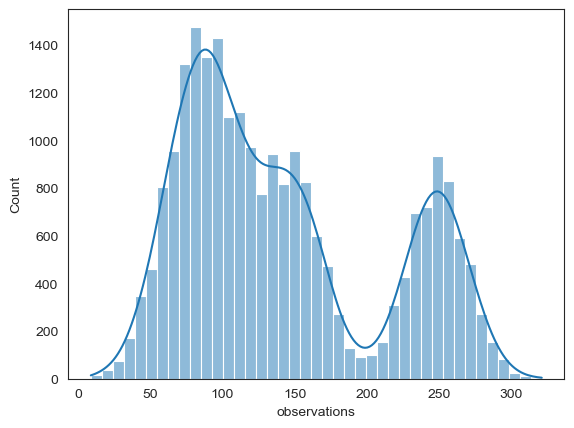

In [48]:
sns.histplot(data=observations, x='observations', kde=True)
plt.show()

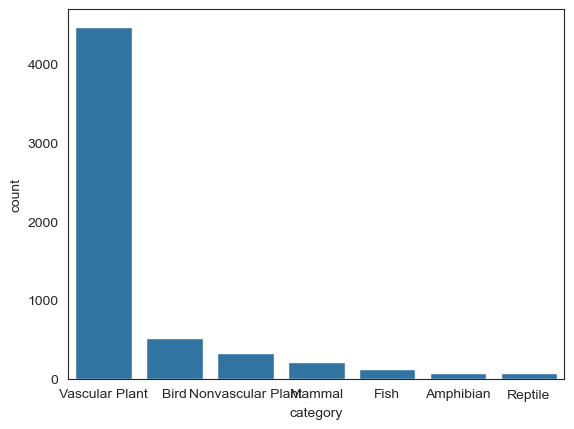

In [57]:
sns.countplot(data=species_info, x='category', order=species_info.category.value_counts().index)
plt.show()

In [58]:
species_info.columns, observations.columns

(Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object'),
 Index(['scientific_name', 'park_name', 'observations'], dtype='object'))

In [59]:
species_info.conservation_status.isna().sum(
    axis=0
)

5633

In [61]:
observations.observations.std()

69.89053226717053

In [63]:
# LabelEncoder and OneHotEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

one_hot_encoder = OneHotEncoder()

category_label_encoded = label_encoder.fit_transform(species_info.category)

category_label_encoded, len(category_label_encoded), np.mean(category_label_encoded)

(array([3, 3, 3, ..., 6, 6, 6]), 5824, 5.144917582417582)

In [66]:
category_one_encoded = one_hot_encoder.fit_transform(species_info.category.to_numpy().reshape(-1, 1))

In [69]:
category_one_encoded.toarray().shape

(5824, 7)

In [70]:
species_info.columns, observations.columns

(Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object'),
 Index(['scientific_name', 'park_name', 'observations'], dtype='object'))

In [73]:
len(species_info.scientific_name)

5824

In [74]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [75]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
